In [1]:
from PIL import Image
import os, glob
print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [2]:
import os
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/my_rsp_full/my_rsp_final/test/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel0038/aiffel/my_rsp_full/my_rsp_final/test/scissor
가위 이미지 resize 완료!


In [3]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/my_rsp_full/my_rsp_final/test/rock"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")
    
print("바위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel0038/aiffel/my_rsp_full/my_rsp_final/test/rock
바위 이미지 resize 완료!


In [4]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/my_rsp_full/my_rsp_final/test/paper"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")
    
print("보 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel0038/aiffel/my_rsp_full/my_rsp_final/test/paper
보 이미지 resize 완료!


In [5]:
import numpy as np
def load_train_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data= 3916   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels
image_dir_path = os.getenv("HOME") + "/aiffel/my_rsp_full/my_rsp_final"
(x_train, y_train)=load_train_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3916 입니다.
x_train shape: (3916, 28, 28, 3)
y_train shape: (3916,)


라벨:  0


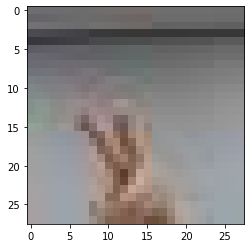

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [7]:
import numpy as np
def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=300   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/my_rsp_full/my_rsp_final/test"
(x_test, y_test)=load_data(image_dir_path)
x_train_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [8]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=15

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

In [9]:
#VGGNET

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), input_shape=(28,28,3), activation = 'relu'))
model.add(keras.layers.Conv2D(64,(3,3),padding = 'same', activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Dropout(rate = 0.5))
model.add(keras.layers.Conv2D(128, (3,3), padding = 'same', activation = 'relu'))
model.add(keras.layers.Conv2D(256, (3,3), padding = 'valid', activation = 'relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Dropout(rate = 0.5))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dropout(rate = 0.5))
model.add(keras.layers.Dense(256, activation = 'relu'))
model.add(keras.layers.Dropout(rate = 0.5))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 256)       295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 256)        

In [10]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train,  y_train, epochs= 25)

Epoch 1/25
123/123 [==============================] - 7s 59ms/step - loss: 3.5181 - accuracy: 0.3608
Epoch 2/25
123/123 [==============================] - 1s 5ms/step - loss: 0.9318 - accuracy: 0.5730
Epoch 3/25
123/123 [==============================] - 1s 5ms/step - loss: 0.6650 - accuracy: 0.7245
Epoch 4/25
123/123 [==============================] - 1s 4ms/step - loss: 0.5139 - accuracy: 0.7896
Epoch 5/25
123/123 [==============================] - 1s 5ms/step - loss: 0.4331 - accuracy: 0.8253
Epoch 6/25
123/123 [==============================] - 1s 4ms/step - loss: 0.3587 - accuracy: 0.8680
Epoch 7/25
123/123 [==============================] - 1s 5ms/step - loss: 0.3176 - accuracy: 0.8833
Epoch 8/25
123/123 [==============================] - 1s 5ms/step - loss: 0.3019 - accuracy: 0.8894
Epoch 9/25
123/123 [==============================] - 1s 5ms/step - loss: 0.2551 - accuracy: 0.9060
Epoch 10/25
123/123 [==============================] - 1s 5ms/step - loss: 0.2331 - accuracy: 0.916

In [11]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=3)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

test_loss: 0.35517045855522156 
test_accuracy: 0.8500000238418579


### 이번 가위바위보 프로젝트하면서 느낀 건 딱 한가지이다. 바로 '데이터의 중요성'이다. 처음엔 내가 찍은 300개 갖고 아둥바둥했고 처음엔 노이즈가 많이 껴서 그렇다고 생각했다. 그래서 다시 깔끔하게 300개를 찍어서 다시 했다. 깔끔하다보니 노이즈가 적어 정확도가 좋아졌다고 생각했지만 정확도가 안정적이지 못했다. 그다음 내가 생각해 낸것은 모델이었다. 모델이 별로라서 VGGNet을 이용해서 테스트해봤지만 정확도가 조금 좋아졌을뿐 안정성에서는 꽝이었다.   
### 나중엔 자포자기로 한번 슬랙에 들어와 있는 모든 학생의 손 3912개를 가져와서 시도했다. 결과는 안정적인 정확도가 나왔다. 여기서 딥러닝을 위해 가장 중요한 건 풍부한 데이터셋이고 풍부한 데이터셋이 보장되지 않는 한 좋은 모델이나 좋은 데이터는 의미가 없다는 것을 느꼈다.